#Proyecto_MCL

##1.Cargando Librerías necesarias

In [14]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##2. Conectarse a google drive y cargar el CSV con el dataset

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/DeepLearning/main/Datasets/horas_estudio_tutorias_vs_aprobacion.csv")

##3. Conociendo los datos

In [ ]:
#primeros 5 registros del dataframe
df.head(5)

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [17]:
#dimensiones del dataframe
print("matrix df [MxN] ->"+str(df.shape))
#verificamos que no hayan nulos
print("---Columnas con valores nulos--")
print(df.isnull().sum())

matrix df [MxN] ->(1000, 3)
---Columnas con valores nulos--
horas_autoestudio_diario    0
tutorias_mes                0
aprobo_perdio               0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


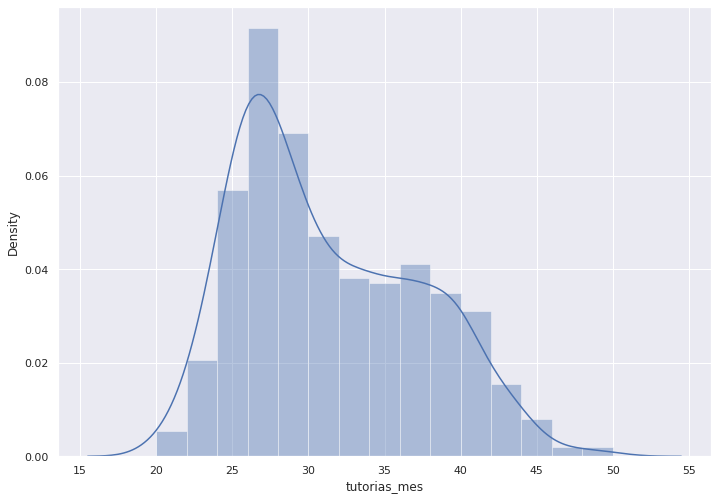

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['tutorias_mes'])                #agregamos los datos
plt.show()

##4.Separando los datos para el entrenamiento

separaremos las características y etiquetamos como X e Y respectivamente.

  -la variable X (horas_autoestudio_diario + tutorias_mes)
  -la varible Y (aprobo_perdio)

In [19]:
x = df.drop('aprobo_perdio',axis = 1)
y = df.aprobo_perdio
df.head()

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


Dividiremos los datos en conjuntos de train y test. Esto separará 25%(! valor predeterminado) de los datos en un subconjunto para la parte de prueba y el 75% restante se usará para nuestro subconjunto de entrenamiento

In [20]:
#separamos los datos 25%(test) y 75%(train)
#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
#Si deseamos cambiar la proporción solo debemos agregar la variable test_size=0.x 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.2)

#Regresion Lineal


##Evaluación del modelo

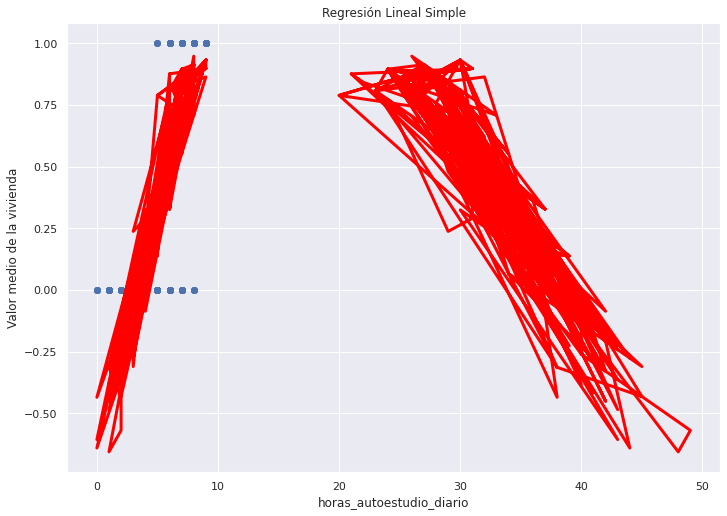


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.7110721866324381


In [54]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(x_test)
plt.scatter(x_test['horas_autoestudio_diario'], y_test)
plt.plot(x_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('horas_autoestudio_diario')
plt.ylabel('Valor medio de la vivienda')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(x_train, y_train))

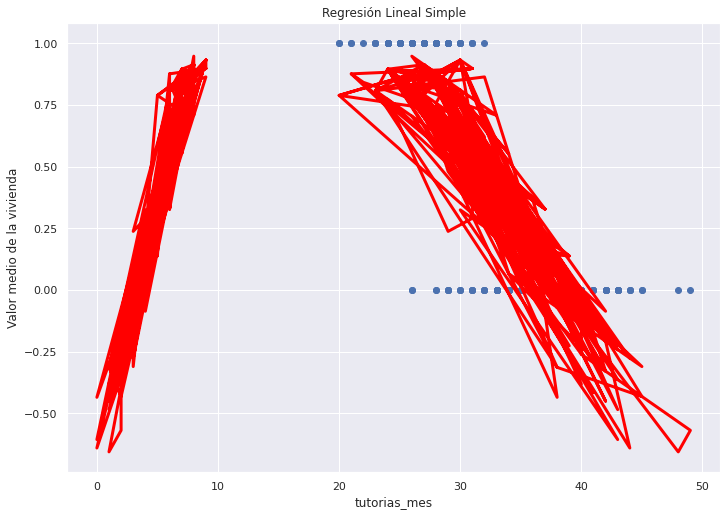


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.7110721866324381


In [55]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(x_test)
plt.scatter(x_test['tutorias_mes'], y_test)
plt.plot(x_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('tutorias_mes')
plt.ylabel('Valor medio de la vivienda')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(x_train, y_train))

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 0.2687600292861468
R2 resultado es 0.7110721866324381


El rendimiento del modelo para el conjunto de pruebas
--------------------------------------
RMSE es 0.28271583858456684
R2 resultado es 0.6802550439580966


##Entrenamos

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#entrenamos
regressor.fit(x_train, y_train)
#predecimos
pred = regressor.predict(x_test)

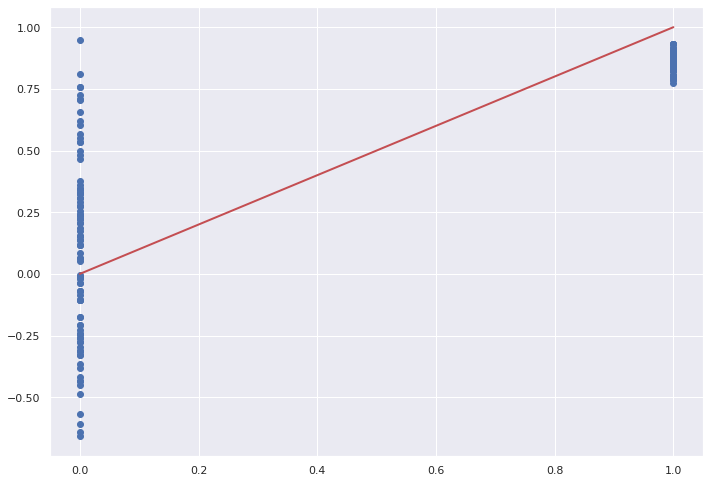

Precisión del modelo: 0.6802550439580966


In [58]:
#visualizar la predicción en los datos de testeo
plt.scatter(y_test, pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', lw=2)
plt.show()
print("Precisión del modelo: "+str(regressor.score(x_test, y_test)))

#Regresion logistica

##Importamos la clase LogisticRegresion de scikit-learn

In [21]:
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

##Entrena la regresión logística con los datos de entrenamiento

In [22]:
#entrenando modelo de regresión logistica
regresion_logistica.fit(x,y)

LogisticRegression()

##Haciendo predicciones

In [23]:
#usaremos el 20% de los datos para probar el modelo
#ejecutamos la predicción con datos de prueba (x_test)
y_prediccion = regresion_logistica.predict(x_test)

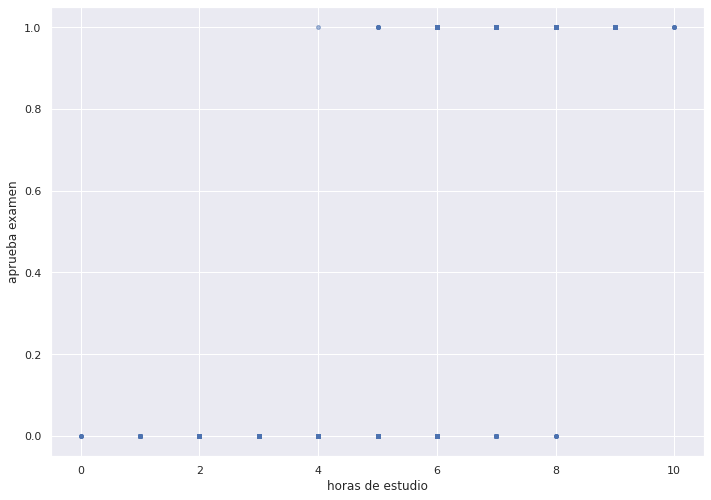

In [24]:
#visualizar la predicción en los datos de testeo
X = df['horas_autoestudio_diario']
y = df['aprobo_perdio']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('horas de estudio')
plt.ylabel('aprueba examen')
plt.show()

##Generando probabilidades de la predicción

In [25]:
#comparamos los datos de predicción (y_prediccion) VS los datos de prueba (y_test)
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud_porcentaje= "+str(100 * exactitud))

exactitud_porcentaje= 97.0


probemos con datos manuales para probar el modelo

In [31]:
#hagamos prediccion con datos manuales: 
#              [horas_estudio , horas_tutoria]
#1-estudiante: [ 4            , 38 ]
#2-estudiante: [ 8            , 29 ]
#3-estudiante: [ 1            , 1  ]
alumnos=np.array([[4, 38], [8, 29],[1,1]])
x_nuevo = pd.DataFrame(alumnos,columns = ['horas_autoestudio_diario','tutorias_mes'])
y_prediccion = regresion_logistica.predict(x_nuevo)
print(y_prediccion)

[0 1 1]


#Arboles de decision

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
data_tree = DecisionTreeClassifier()
data_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred = data_tree.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Puntaje del entrenamiento: ", data_tree.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       101
           1       0.99      1.00      0.99        99

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

[[100   1]
 [  0  99]]
Puntaje del entrenamiento:  99.125


#Matriz Confucion

[[100   1]
 [  0  99]]


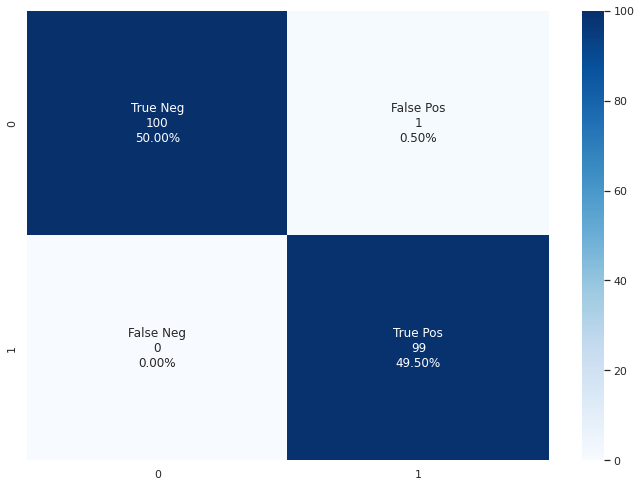

In [63]:
#Métricas para comprobar
from sklearn.metrics import confusion_matrix 
import numpy as np
cm=confusion_matrix(y_test,y_pred)
print(cm)
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

#Graficas


[Text(0.5, 1.0, 'Recuento de estudiantes que pasan segun las horas de estudio')]

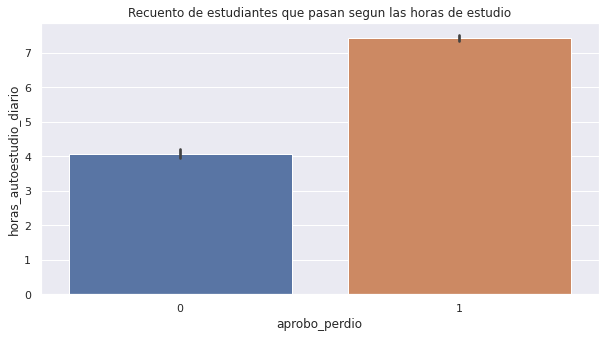

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=df,x='aprobo_perdio',y='horas_autoestudio_diario',ax=ax)
ax.set(title='Recuento de estudiantes que pasan segun las horas de estudio')

[Text(0.5, 1.0, 'Entre mas tutorias hay menos autoestudio')]

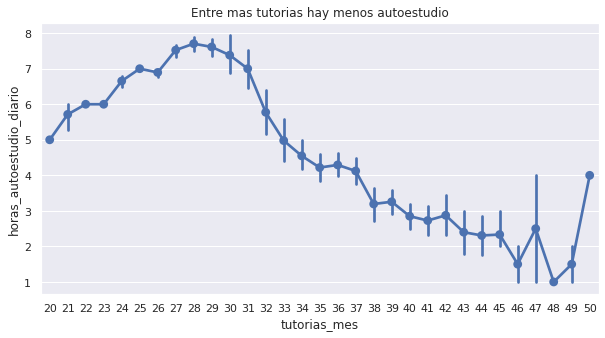

In [42]:
fig, ax = plt.subplots(figsize=(10,5))

sns.pointplot(data=df,x='tutorias_mes',y='horas_autoestudio_diario',ax=ax)
ax.set(title='Entre mas tutorias hay menos autoestudio')


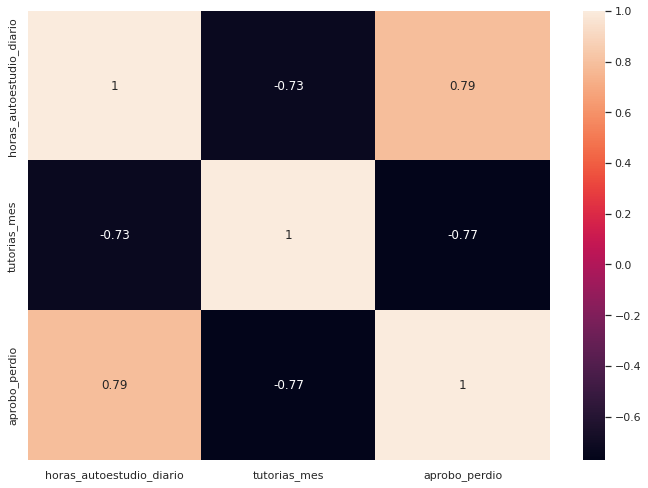

In [38]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

#Conclusion


____


Como conclusion para este dataset de datos encontramos que gracias a la regresion logistica la mayoria de estudiantes que estudian por su cuenta aprueban mas que los que asisten a tutorias ya que los que asisten a tutorias no estudian por su cuenta, el porcentaje que se obtuvo con este tipo de entrenamiento fue de un 97% indicandonos que es un modelo por el cual nos podemos fiar de la informacion dada,mientras que en la regresion lineal no se encontro ningun valor a evaluar y se obtuvo un porcentaje del 67% en el entrenamiento, por ultimo usando el modelo de diagrama de arbol nos da un 99% de entrenamiento pero sin ninguna informacion util para estudiar el caso.